In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from plotly.offline import plot
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score

from utils import save_plotly_figure_as_html
from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features
from ex_04_my_kmeans import MyKMeans


In [2]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_04")
plot_path.mkdir(parents=True, exist_ok=True)


data, labels, exp_ids = get_welding_data(data_path, n_samples=5_000)

## Exercise 4.2: Optimal Cluster Selection

Implement the elbow method to find the optimal number of clusters for the raw time series data using your implement of the kmeans algorithm (MyKMeans).

1. Calculate the distortion (inertia) for different values of k (1 to 10)
2. Plot the results to identify the "elbow point" with matplotlib where adding more clusters produces diminishing returns
3. This will help determine the most appropriate number of clusters for our welding data

KMeans fitting:  78%|███████▊  | 39/50 [00:04<00:01,  7.95it/s]


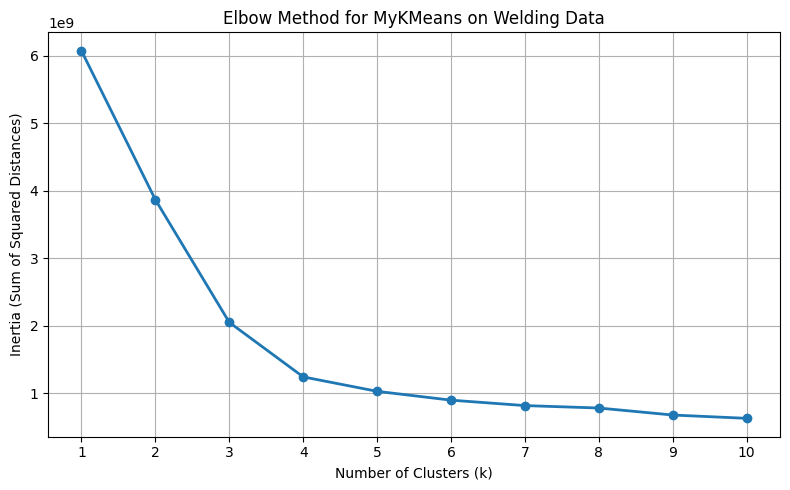

In [3]:
# 1) Flatten 3D time-series into 2D feature matrix once
X_flat = data.reshape(data.shape[0], -1)
assert X_flat.ndim == 2, f"Flattened data must be 2D, got {X_flat.ndim}D"

# 2) Define reusable elbow_data function that expects 2D input
def elbow_data(X, k_range=range(1, 11), distance_metric="euclidean",
               max_iter=50, init_method="kmeans++"):
    """
    Compute inertia values for a range of cluster counts using MyKMeans on 2D data.
    """
    inertias = []
    for k in k_range:
        model = MyKMeans(
            k=k,
            max_iter=max_iter,
            distance_metric=distance_metric,
            init_method=init_method
        )
        model.fit(X)
        inertias.append(model.inertia_)
    return inertias

# 3) Compute inertias for k=1..10
ks = list(range(1, 11))
inertias = elbow_data(X_flat, ks)

# 4) Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, 'o-', linewidth=2, markersize=6)
plt.xticks(ks)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for MyKMeans on Welding Data')
plt.grid(True)
plt.tight_layout()
# Save and show
plt.savefig(plot_path / 'elbow_method_my_kmeans.png', dpi=300)
plt.show()


## Exercise 4.3: Clustering with MyKMeans

### Based on the elbow curve above, explain your choice of k:

1. What does the shape of the elbow curve tell you about the underlying data structure?
2. Why did you select this specific number of clusters?
   - Consider the plot and the elbow method to justify your choice
   - How might this choice affect the interpretability of the resulting clusters?

### KMeans with euclidean distance and dtw distance
1. run K means with you selected k 


## Exercise 4.4: Cluster Visualization

Plot the mean time series (centroids) for each cluster to visualize and understand the patterns.

Remember that our welding data has both current and voltage measurements over time (shape: n_samples, sequence_length, features). For each cluster:
1. Plot the average current pattern
2. Plot the average voltage pattern
3. Look for distinctive characteristics in each cluster that might relate to welding quality

This visualization will help identify what makes each cluster unique in terms of temporal patterns.

## Exercise 4.5: Feature-Based Clustering

Now we'll use the engineered features extracted in Exercise 3 instead of raw time series data. Therefore, you can use the euclidean distance metric.

1. Load your extracted features from exercise 3 
2. Split them into data and labels
3. Scale the data for better clustering performance
4. Apply the elbow method again to determine the optimal number of clusters for the feature-based approach
5. Compare this result with the clustering of raw time series data. Consider why the optimal k might differ between the two approaches:
   - Do engineered features represent the data differently?
   - Which approach might better capture the relevant patterns for quality assessment?


In [4]:
# Extract features from the data
features = extract_features(data, labels)

## Exercise 4.6: Advanced 3D Visualization

Visualize the clustering results using interactive 3D plots with Plotly.

1. Use PCA to reduce the dimensionality of our feature space to 3 components
2. Create two visualizations:
   - Points colored by assigned cluster
   - Same points colored by actual quality labels
3. Include the explained variance for each principal component in the axis labels
4. Save the figures to the plot_path


This visualization will help us understand how well our clustering approach aligns with the known quality designations.

#### Note:
- You can use the following links to find more information about the PCA:
   - https://en.wikipedia.org/wiki/Principal_component_analysis
   - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [5]:
fig1_save_path = save_plotly_figure_as_html(fig1, output_dir / f'clusters_3d_{n_clusters}_clusters')
fig2_save_path = save_plotly_figure_as_html(fig2, output_dir / f'quality_3d_{n_clusters}_clusters')

NameError: name 'fig1' is not defined

## Exercise 4.7: Analysis and Interpretation

Analyze the clustering results in depth and discuss their implications:

1. Cluster separation:
   - How well do clusters separate different quality levels?
   - What is the Adjusted Rand Index between clusters and quality labels?
   - Are there clusters that predominantly contain good or bad welds?

2. Feature importance:
   - Which features seem most important for distinguishing clusters?
   - How does the PCA visualization help us understand the data structure?

3. Process insights:
   - What insights could these clusters provide for improving the welding process?
   - Could certain clusters identify specific types of welding issues?

4. Limitations:
   - What are the limitations of using clustering for quality assessment?
   - How might the approach be improved in future iterations?

